## Installing yfinance 

In [19]:
!pip install yfinance

## Importing required libraries 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

## Defining the symbol of stock and time period (AMZN : Amazon.com, Inc.)

In [21]:
symbol_of_stock = "AMZN"
start_date = "2022-01-01"
end_date = "2022-12-31"

In [22]:
stock_data = yf.download(symbol_of_stock, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


## calculating the moving averages 

In [23]:
stock_data['MA_30'] = stock_data['Close'].rolling(window=30).mean()
stock_data['MA_65'] = stock_data['Close'].rolling(window=65).mean()
stock_data['MA_200'] = stock_data['Close'].rolling(window=200).mean()

## calculating returns and cumulative return

In [24]:
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['Cumulative_Return'] = (1 + stock_data['Return']).cumprod()

##  Plotting the AMZN stock analysis graph

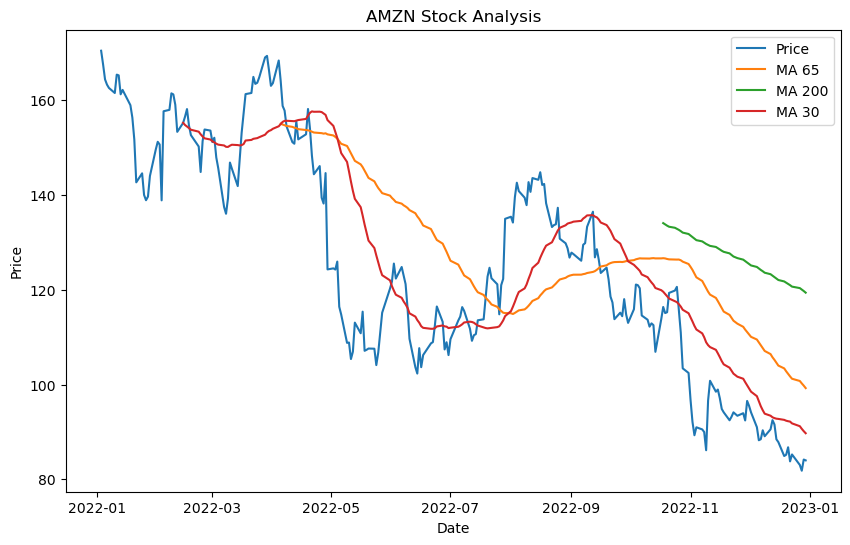

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Price')
plt.plot(stock_data.index, stock_data['MA_65'], label='MA 65')
plt.plot(stock_data.index, stock_data['MA_200'], label='MA 200')
plt.plot(stock_data.index, stock_data['MA_30'], label='MA 30')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"{symbol_of_stock} Stock Analysis")
plt.legend()
plt.show()


In [26]:
print(stock_data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  167.550003  170.703506  166.160507  170.404495  170.404495   
2022-01-04  170.438004  171.399994  166.349503  167.522003  167.522003   
2022-01-05  166.882996  167.126495  164.356995  164.356995  164.356995   
2022-01-06  163.450500  164.800003  161.936996  163.253998  163.253998   
2022-01-07  163.839005  165.243500  162.031006  162.554001  162.554001   
...                ...         ...         ...         ...         ...   
2022-12-23   83.250000   85.779999   82.930000   85.250000   85.250000   
2022-12-27   84.970001   85.349998   83.000000   83.040001   83.040001   
2022-12-28   82.800003   83.480003   81.690002   81.820000   81.820000   
2022-12-29   82.870003   84.550003   82.550003   84.180000   84.180000   
2022-12-30   83.120003   84.050003   82.470001   84.000000   84.000000   

              Volume      MA_30      

In [31]:
print(stock_data[['Close', 'Return', 'Cumulative_Return']].head(10))

                 Close    Return  Cumulative_Return
Date                                               
2022-01-03  170.404495       NaN                NaN
2022-01-04  167.522003 -0.016916           0.983084
2022-01-05  164.356995 -0.018893           0.964511
2022-01-06  163.253998 -0.006711           0.958038
2022-01-07  162.554001 -0.004288           0.953930
2022-01-10  161.485992 -0.006570           0.947663
2022-01-11  165.362000  0.024002           0.970409
2022-01-12  165.207001 -0.000937           0.969499
2022-01-13  161.214005 -0.024170           0.946067
2022-01-14  162.138000  0.005731           0.951489


In [32]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [33]:
# Define a function to create training and testing datasets
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [34]:
# Choose the number of time steps and split data into training and testing sets
time_step = 100
X_train, Y_train = create_dataset(scaled_data, time_step)
X_test, Y_test = create_dataset(scaled_data, time_step)

In [35]:
# Reshape data for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [36]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [45]:
# Train the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=75, batch_size=64)

Epoch 1/75
3/3 [==============================] - 1s 189ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 2/75
3/3 [==============================] - 1s 198ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 3/75
3/3 [==============================] - 0s 167ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 4/75
3/3 [==============================] - 0s 167ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/75
3/3 [==============================] - 0s 174ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6/75
3/3 [==============================] - 1s 176ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/75
3/3 [==============================] - 1s 183ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/75
3/3 [==============================] - 0s 183ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/75
3/3 [==============================] - 1s 236ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/75
3/3 [==============================] - 1s 222ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 11/75
3/3 [==

In [47]:
# Predict stock prices
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

5/5 [==============================] - 0s 34ms/step


In [52]:
# Inverse transform predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

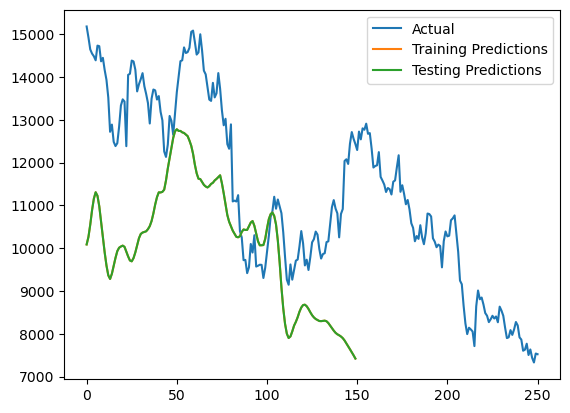

In [53]:
plt.plot(scaler.inverse_transform(data['Close'].values.reshape(-1, 1)), label='Actual')
plt.plot(train_predict, label='Training Predictions')
plt.plot(test_predict, label='Testing Predictions')
plt.legend()
plt.show()